In [126]:
%matplotlib inline

In [127]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [128]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# import networkx generators
import networkx.generators.small

# traversal algorithms
from networkx.algorithms import traversal

### Edge List

| from | to  | value |
| ---- | --- | ----- |
|  A   |  B  |   2   |
|  A   |  D  |   5   |
|  A   |  E  |   5   |
|  B   |  A  |   2   |
|  B   |  D  |   1   |
|  C   |  D  |   3   |
|  C   |  E  |   4   |
|  D   |  A  |   5   |
|  D   |  B  |   1   |
|  D   |  C  |   3   |
|  E   |  A  |   5   |
|  E   |  C  |   4   |

In [129]:
edges = [
    ['A', 'B', 2], 
    ['A', 'D', 5], 
    ['A', 'E', 5], 
    ['B', 'A', 2],
    ['B', 'D', 1], 
    ['C', 'D', 3], 
    ['C', 'E', 4], 
    ['D', 'A', 5]
]
edges

[['A', 'B', 2],
 ['A', 'D', 5],
 ['A', 'E', 5],
 ['B', 'A', 2],
 ['B', 'D', 1],
 ['C', 'D', 3],
 ['C', 'E', 4],
 ['D', 'A', 5]]

### Adjacency List

In [130]:
edges = {'A':{'B':2, 'D':5, 'E':5}, 'B':{'A':2, 'D':1}}
edges

{'A': {'B': 2, 'D': 5, 'E': 5}, 'B': {'A': 2, 'D': 1}}

In [131]:
g = networkx.generators.small.krackhardt_kite_graph()
g.number_of_edges()
g.number_of_nodes()
g.edges()

18

10

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 4), (1, 6), (2, 3), (2, 5), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7), (7, 8), (8, 9)])

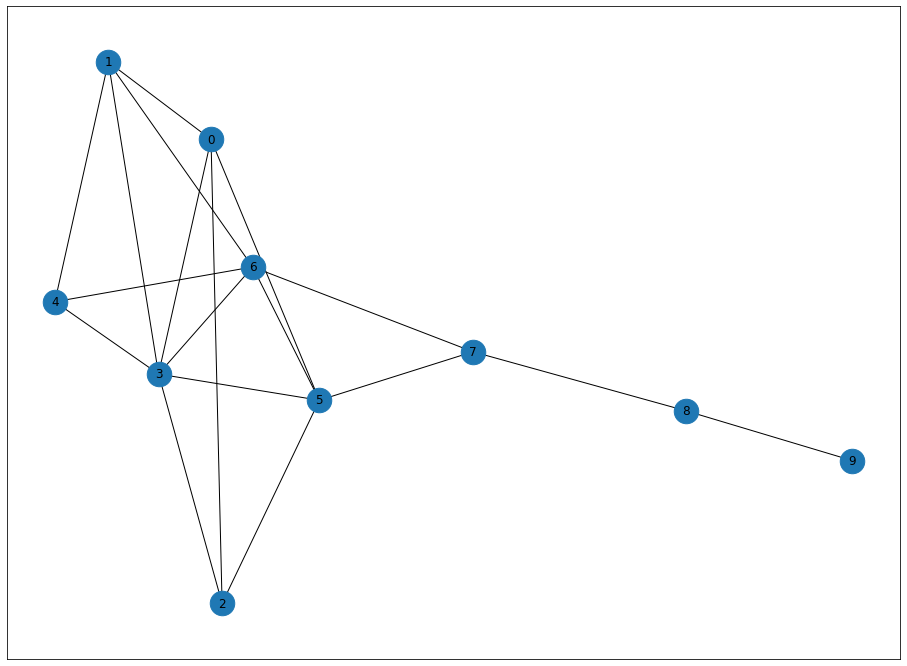

In [132]:
fig, ax = plt.subplots(figsize=(16, 12))
nx.draw_networkx(g, ax=ax, node_size=600)

In [133]:
# Adjacency List
[list(g.neighbors(x)) for x in g.nodes()]

[[1, 2, 3, 5],
 [0, 3, 4, 6],
 [0, 3, 5],
 [0, 1, 2, 4, 5, 6],
 [1, 3, 6],
 [0, 2, 3, 6, 7],
 [1, 3, 4, 5, 7],
 [5, 6, 8],
 [7, 9],
 [8]]

In [134]:
# Adjacency dictionary
dict((x, list(g.neighbors(x))) for x in g.nodes())

{0: [1, 2, 3, 5],
 1: [0, 3, 4, 6],
 2: [0, 3, 5],
 3: [0, 1, 2, 4, 5, 6],
 4: [1, 3, 6],
 5: [0, 2, 3, 6, 7],
 6: [1, 3, 4, 5, 7],
 7: [5, 6, 8],
 8: [7, 9],
 9: [8]}

In [135]:
[(n, nbrdict) for n, nbrdict in g.adjacency()]

[(0, {1: {}, 2: {}, 3: {}, 5: {}}),
 (1, {0: {}, 3: {}, 4: {}, 6: {}}),
 (2, {0: {}, 3: {}, 5: {}}),
 (3, {0: {}, 1: {}, 2: {}, 4: {}, 5: {}, 6: {}}),
 (4, {1: {}, 3: {}, 6: {}}),
 (5, {0: {}, 2: {}, 3: {}, 6: {}, 7: {}}),
 (6, {1: {}, 3: {}, 4: {}, 5: {}, 7: {}}),
 (7, {5: {}, 6: {}, 8: {}}),
 (8, {7: {}, 9: {}}),
 (9, {8: {}})]

### DFS and BFS Traversals

In [136]:
def DFS_nodes(graph, node, visited=None):
    """
    Simple DFS implementation for graph traversal of Nodes
    """
    if not visited:
        visited = []
    visited.append(node)
    for neighbor in graph[node]:
        if not neighbor in visited:
            DFS_nodes(graph, neighbor, visited)
    return visited


def DFS_edges(graph, node, visited=[], edges=None):
    """
    Simple DFS implementation for graph traversal of edges
    """
    if not edges:
        edges = []
    visited.append(node)
    for ni in graph[node]:
        if not ni in visited:
            edges.append((node, ni))
            DFS_edges(graph, ni, visited, edges)
    return edges

In [137]:
DFS_nodes(g, 0)

[0, 1, 3, 2, 5, 6, 4, 7, 8, 9]

In [138]:
DFS_edges(g, 0)

[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)]

In [139]:
edges = traversal.dfs_edges(g)
edges

<generator object dfs_edges at 0x0000020C54C84BC8>

In [140]:
list(edges)

[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)]

In [141]:
# conventional tree view with a successor dictionary
traversal.dfs_successors(g)

{0: [1], 1: [3], 3: [2], 2: [5], 5: [6], 6: [4, 7], 7: [8], 8: [9]}

In [142]:
# also, predecessor are available -- a view of the tree upside down
traversal.dfs_predecessors(g)

{1: 0, 3: 1, 2: 3, 5: 2, 6: 5, 4: 6, 7: 6, 8: 7, 9: 8}

In [143]:
# remember, this is all just lists and dictionaries!
traversal.dfs_successors(g)[3]
traversal.dfs_successors(g)[6]

[2]

[4, 7]

In [144]:
tree = traversal.dfs_tree(g)
tree

tree.successors(0)
tree.succ

AdjacencyView({0: {1: {}}, 1: {3: {}}, 2: {5: {}}, 3: {2: {}}, 4: {}, 5: {6: {}}, 6: {4: {}, 7: {}}, 7: {8: {}}, 8: {9: {}}, 9: {}})

In [145]:
edges = traversal.bfs_edges(g, 0)
list(edges)

[(0, 1), (0, 2), (0, 3), (0, 5), (1, 4), (1, 6), (5, 7), (7, 8), (8, 9)]

In [146]:
tree = traversal.bfs_tree(g, 0)
tree

{0: [1, 2, 3, 5], 1: [4, 6], 5: [7], 7: [8], 8: [9]}

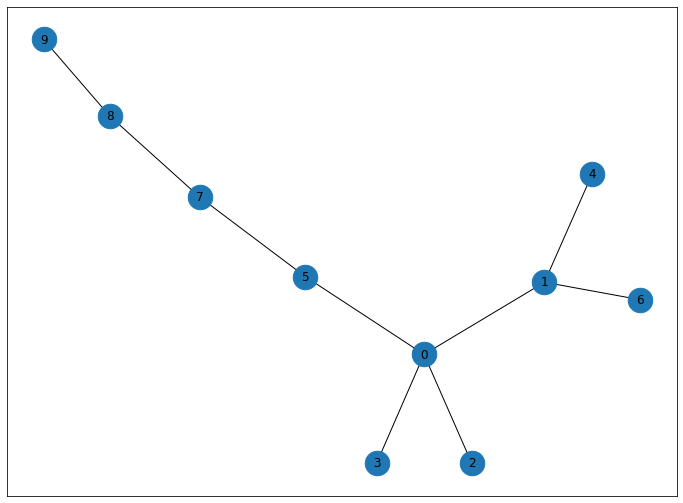

In [147]:
bfs_tree = {n: succ for n,succ in traversal.bfs_successors(g, 0)}
bfs_tree

fig, ax = plt.subplots(figsize=(12, 9))
nx.draw_networkx(nx.from_dict_of_lists(bfs_tree),  ax=ax, node_size=600)

{0: [1], 1: [3], 3: [2], 2: [5], 5: [6], 6: [4, 7], 7: [8], 8: [9]}

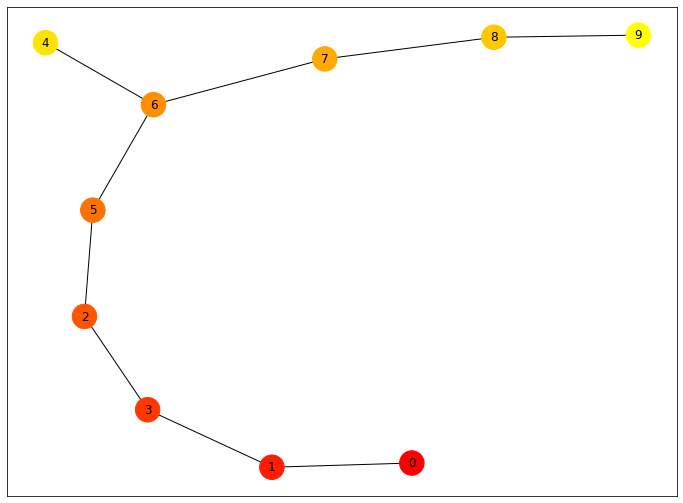

In [148]:
nodes_dict_path = traversal.dfs_successors(g, 0)
nodes_dict_path 

fig, ax = plt.subplots(figsize=(12, 9))
# Colormap List = https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html 
nx.draw_networkx(nx.from_dict_of_lists(nodes_dict_path),  ax=ax, node_size=600, node_color=g.nodes(), cmap=plt.get_cmap('autumn'))

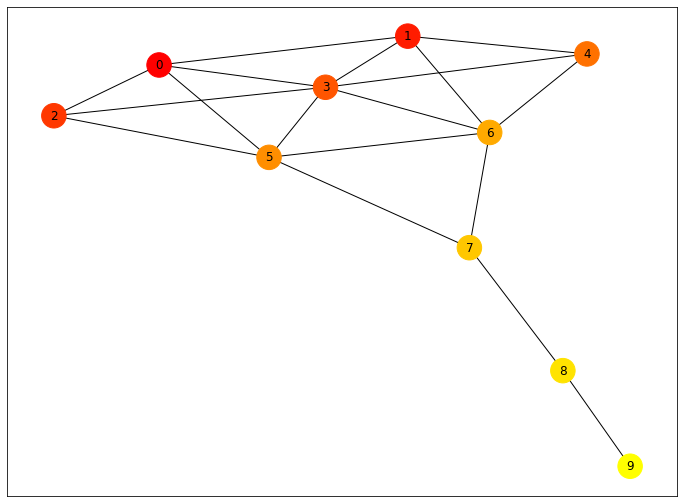

In [149]:
fig, ax = plt.subplots(figsize=(12, 9))
nx.draw_networkx(g, ax=ax, node_size=600, node_color=g.nodes(), cmap=plt.get_cmap('autumn'))

In [150]:
from networkx import algorithms

print(f"Shortest path from 0 -> 5 {algorithms.shortest_path(g, 0, 5)}")

print(f"Shortest path from 0 -> 7 {algorithms.shortest_path(g, 0, 7)}")

print(f"Average shortest path = {algorithms.average_shortest_path_length(g):.5}")

Shortest path from 0 -> 5 [0, 5]
Shortest path from 0 -> 7 [0, 5, 7]
Average shortest path = 1.9778


In [151]:
list(algorithms.all_pairs_shortest_path(g))[5]

(5,
 {5: [5],
  0: [5, 0],
  2: [5, 2],
  3: [5, 3],
  6: [5, 6],
  7: [5, 7],
  1: [5, 0, 1],
  4: [5, 3, 4],
  8: [5, 7, 8],
  9: [5, 7, 8, 9]})

In [152]:
# Dijkstra algorithms
algorithms.dijkstra_path(g, 1, 5)

algorithms.dijkstra_predecessor_and_distance(g, 1, 5)

[1, 0, 5]

({1: [],
  0: [1],
  3: [1],
  4: [1],
  6: [1],
  2: [0, 3],
  5: [0, 3, 6],
  7: [6],
  8: [7],
  9: [8]},
 {1: 0, 0: 1, 3: 1, 4: 1, 6: 1, 2: 2, 5: 2, 7: 2, 8: 3, 9: 4})

In [153]:
import itertools

nn = g.nodes()
print(f"All nodes: {nn}")

print(f"All node pairs: {list(itertools.combinations(nn, 2))}")

All nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
All node pairs: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


In [118]:
pairs = list(itertools.combinations(list(nn)[:4], 2))
pairs

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [119]:
# Compare shortest paths algorithms
for pair in itertools.combinations(list(nn)[:8], 2):
    print(algorithms.shortest_path(g, *pair), algorithms.dijkstra_path(g, *pair))

[0, 1] [0, 1]
[0, 2] [0, 2]
[0, 3] [0, 3]
[0, 1, 4] [0, 1, 4]
[0, 5] [0, 5]
[0, 1, 6] [0, 1, 6]
[0, 5, 7] [0, 5, 7]
[1, 0, 2] [1, 0, 2]
[1, 3] [1, 3]
[1, 4] [1, 4]
[1, 0, 5] [1, 0, 5]
[1, 6] [1, 6]
[1, 6, 7] [1, 6, 7]
[2, 3] [2, 3]
[2, 3, 4] [2, 3, 4]
[2, 5] [2, 5]
[2, 3, 6] [2, 3, 6]
[2, 5, 7] [2, 5, 7]
[3, 4] [3, 4]
[3, 5] [3, 5]
[3, 6] [3, 6]
[3, 5, 7] [3, 5, 7]
[4, 3, 5] [4, 3, 5]
[4, 6] [4, 6]
[4, 6, 7] [4, 6, 7]
[5, 6] [5, 6]
[5, 7] [5, 7]
[6, 7] [6, 7]


In [154]:
# Let's add some random weights
from random import choice

new_edges = [x + (choice(range(10)),) for x in g.edges()]
new_edges

[(0, 1, 4),
 (0, 2, 1),
 (0, 3, 2),
 (0, 5, 8),
 (1, 3, 2),
 (1, 4, 2),
 (1, 6, 2),
 (2, 3, 6),
 (2, 5, 7),
 (3, 4, 1),
 (3, 5, 0),
 (3, 6, 8),
 (4, 6, 5),
 (5, 6, 5),
 (5, 7, 2),
 (6, 7, 4),
 (7, 8, 8),
 (8, 9, 0)]

In [155]:
g.clear()
g.add_weighted_edges_from(new_edges)

# Let's compare paths again
for pair in itertools.combinations(list(nn)[:8], 2):
    print(algorithms.shortest_path(g, *pair), algorithms.dijkstra_path(g, *pair))

[0, 1] [0, 1]
[0, 2] [0, 2]
[0, 3] [0, 3]
[0, 5] [0, 3, 5]
[0, 1, 4] [0, 3, 4]
[0, 1, 6] [0, 1, 6]
[0, 5, 7] [0, 3, 5, 7]
[1, 0, 2] [1, 0, 2]
[1, 3] [1, 3]
[1, 0, 5] [1, 3, 5]
[1, 4] [1, 4]
[1, 6] [1, 6]
[1, 6, 7] [1, 3, 5, 7]
[2, 3] [2, 0, 3]
[2, 5] [2, 0, 3, 5]
[2, 3, 4] [2, 0, 3, 4]
[2, 3, 6] [2, 0, 1, 6]
[2, 5, 7] [2, 0, 3, 5, 7]
[3, 5] [3, 5]
[3, 4] [3, 4]
[3, 6] [3, 1, 6]
[3, 5, 7] [3, 5, 7]
[5, 3, 4] [5, 3, 4]
[5, 6] [5, 3, 1, 6]
[5, 7] [5, 7]
[4, 6] [4, 1, 6]
[4, 6, 7] [4, 3, 5, 7]
[6, 7] [6, 7]
